In [79]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [80]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [81]:
# Change name format to have underscore
sales.rename(columns={
    "Invoice ID": "Invoice_ID",
    "Customer type": "Customer_type",
    "Product line": "Product_line",
    "Unit price": "Unit_price",
    "Tax 5%": "Tax_5%",
    "gross margin percentage": "gross_margin_percentage",
    "gross income": "gross_income"
}, inplace=True)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [82]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["Total"])
y = sales["Total"]

seed = np.random.randint(0, 1000)
print(seed)

407


In [83]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [84]:
X_train.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
607,544-32-5024,C,Naypyitaw,Member,Female,Food and beverages,49.79,4,9.9580,3/28/2019,19:16,Credit card,199.16,4.761905,9.9580,6.4
374,422-29-8786,A,Yangon,Normal,Female,Home and lifestyle,67.09,5,16.7725,1/3/2019,16:47,Credit card,335.45,4.761905,16.7725,9.1
724,434-35-9162,B,Mandalay,Member,Male,Food and beverages,23.34,4,4.6680,2/4/2019,18:53,Ewallet,93.36,4.761905,4.6680,7.4
330,868-81-1752,B,Mandalay,Normal,Male,Home and lifestyle,22.02,9,9.9090,2/7/2019,18:48,Cash,198.18,4.761905,9.9090,6.8
918,777-67-2495,B,Mandalay,Normal,Male,Home and lifestyle,68.97,3,10.3455,2/22/2019,11:26,Ewallet,206.91,4.761905,10.3455,8.7


In [85]:
y_train.head()

607    209.1180
374    352.2225
724     98.0280
330    208.0890
918    217.2555
Name: Total, dtype: float64

In [86]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 607 to 828
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               700 non-null    object 
 1   Branch                   700 non-null    object 
 2   City                     700 non-null    object 
 3   Customer_type            700 non-null    object 
 4   Gender                   700 non-null    object 
 5   Product_line             700 non-null    object 
 6   Unit_price               700 non-null    float64
 7   Quantity                 700 non-null    int64  
 8   Tax_5%                   700 non-null    float64
 9   Date                     700 non-null    object 
 10  Time                     700 non-null    object 
 11  Payment                  700 non-null    object 
 12  cogs                     700 non-null    float64
 13  gross_margin_percentage  700 non-null    float64
 14  gross_income             700 

In [87]:
X_train_copy.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [88]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
607,49.79,4,9.9580,199.16,4.761905,9.9580,6.4
374,67.09,5,16.7725,335.45,4.761905,16.7725,9.1
724,23.34,4,4.6680,93.36,4.761905,4.6680,7.4
330,22.02,9,9.9090,198.18,4.761905,9.9090,6.8
918,68.97,3,10.3455,206.91,4.761905,10.3455,8.7


In [89]:
num_data.describe()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,56.093686,5.520000,15.626924,312.538486,4.761905e+00,15.626924,6.967857
std,26.440577,2.930458,11.863019,237.260373,5.244000e-14,11.863019,1.729111
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.787500,3.000000,5.986375,119.727500,4.761905e+00,5.986375,5.500000
50%,56.020000,5.000000,12.484000,249.680000,4.761905e+00,12.484000,6.900000
75%,78.085000,8.000000,22.634250,452.685000,4.761905e+00,22.634250,8.500000
max,99.960000,10.000000,49.650000,993.000000,4.761905e+00,49.650000,10.000000


<Axes: ylabel='Unit_price'>

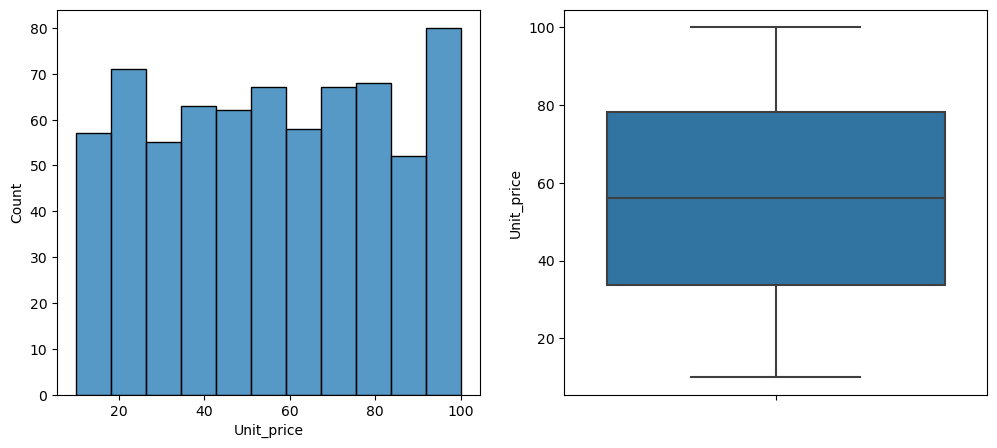

In [90]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="Unit_price", ax=ax[0])
sns.boxplot(data=X_train_copy, y="Unit_price", ax=ax[1])

In [91]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

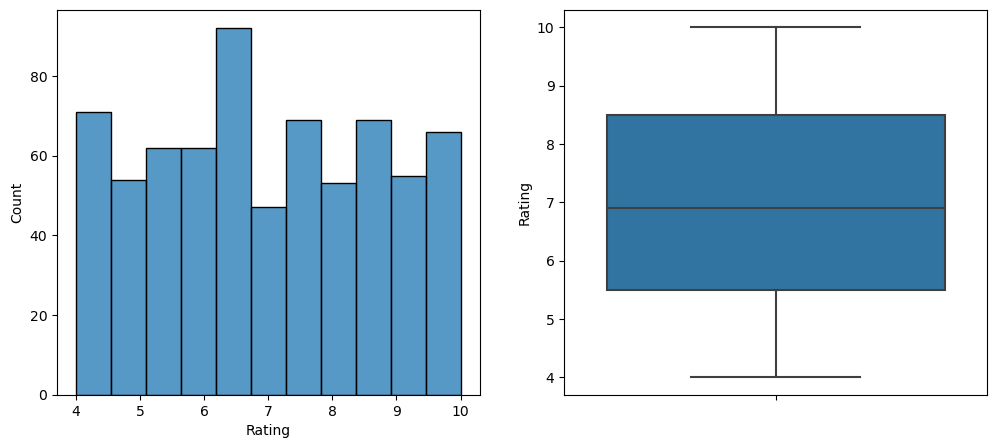

In [92]:
visualize_numeric_feature(X_train_copy, 'Rating')

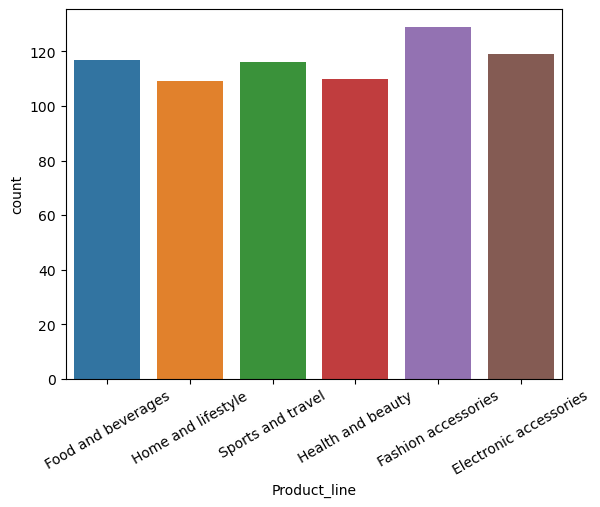

In [93]:
sns.countplot(data=X_train_copy, x="Product_line")
plt.xticks(rotation=30);

In [94]:
cat_feature = X_train_copy.select_dtypes(include=["object"])
cat_feature.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
607,544-32-5024,C,Naypyitaw,Member,Female,Food and beverages,3/28/2019,19:16,Credit card
374,422-29-8786,A,Yangon,Normal,Female,Home and lifestyle,1/3/2019,16:47,Credit card
724,434-35-9162,B,Mandalay,Member,Male,Food and beverages,2/4/2019,18:53,Ewallet
330,868-81-1752,B,Mandalay,Normal,Male,Home and lifestyle,2/7/2019,18:48,Cash
918,777-67-2495,B,Mandalay,Normal,Male,Home and lifestyle,2/22/2019,11:26,Ewallet


In [95]:
cat_feature.describe()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
count,700,700,700,700,700,700,700,700,700
unique,700,3,3,2,2,6,89,422,3
top,544-32-5024,B,Mandalay,Normal,Male,Fashion accessories,1/26/2019,19:48,Cash
freq,1,241,241,355,352,129,15,6,247


In [96]:
cat_feature.isnull().sum()

Invoice_ID       0
Branch           0
City             0
Customer_type    0
Gender           0
Product_line     0
Date             0
Time             0
Payment          0
dtype: int64

In [97]:
pd.unique(cat_feature["Product_line"])

array(['Food and beverages', 'Home and lifestyle', 'Sports and travel',
       'Health and beauty', 'Fashion accessories',
       'Electronic accessories'], dtype=object)

In [98]:
X_train_copy['Product_line'] = X_train_copy['Product_line'].map({
    'Electronic accessories': 'EA',
    'Health and beauty': 'HAB',
    'Fashion accessories': 'FA',
    'Sports and travel': 'SAT',
    'Food and beverages': 'FAB',
    'Home and lifestyle': 'HAL'
})

pd.unique(X_train_copy['Product_line'])

array(['FAB', 'HAL', 'SAT', 'HAB', 'FA', 'EA'], dtype=object)